<a href="https://colab.research.google.com/github/Pranaviate/MachineLearningNotebooks/blob/master/CoronaCasePred_PolyReg_Scilearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving total_cases.csv to total_cases.csv


In [ ]:
!ls

sample_data  total_cases.csv


In [ ]:
corona_case=pd.read_csv('total_cases.csv', sep=',')

In [ ]:
corona_case.head

<bound method NDFrame.head of            date     World  Afghanistan  ...   Yemen   Zambia  Zimbabwe
0    2019-12-31        27          0.0  ...     NaN      NaN       NaN
1    2020-01-01        27          0.0  ...     NaN      NaN       NaN
2    2020-01-02        27          0.0  ...     NaN      NaN       NaN
3    2020-01-03        44          0.0  ...     NaN      NaN       NaN
4    2020-01-04        44          0.0  ...     NaN      NaN       NaN
..          ...       ...          ...  ...     ...      ...       ...
232  2020-08-19  22159548      37599.0  ...  1886.0   9981.0    5378.0
233  2020-08-20  22440517      37759.0  ...  1893.0  10218.0    5643.0
234  2020-08-21  22714274      37856.0  ...  1899.0  10372.0    5745.0
235  2020-08-22  22977973      37894.0  ...  1906.0  10627.0    5815.0
236  2020-08-23  23243621      37999.0  ...  1907.0  10627.0    5893.0

[237 rows x 212 columns]>

In [ ]:
corona_case.describe()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,...,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
count,2.370000e+02,227.000000,168.000000,232.000000,163.000000,155.000000,150.000000,157.000000,170.000000,228.000000,154.000000,237.000000,237.000000,230.000000,159.000000,236.000000,162.000000,159.000000,229.000000,237.000000,153.000000,160.000000,157.000000,163.000000,164.000000,144.000000,164.000000,145.000000,2.370000e+02,150.000000,166.000000,167.000000,164.000000,145.000000,228.000000,164.000000,237.000000,156.000000,157.000000,161.000000,...,151.000000,169.000000,171.000000,160.000000,169.000000,237.000000,140.000000,236.000000,228.000000,163.000000,157.000000,162.000000,237.000000,237.000000,154.000000,237.000000,115.000000,160.00000,230.000000,155.000000,163.000000,164.000000,168.000000,163.000000,152.00000,155.000000,163.000000,231.000000,237.000000,2.370000e+02,152.000000,162.000000,160.000000,162.000000,161.000000,233.000000,120.000000,136.000000,158.000000,156.000000
mean,5.672580e+06,12792.907489,2180.708333,9033.594828,733.693252,404.516129,2.953333,43.910828,63215.541176,11731.991228,188.006494,6306.675105,11035.683544,8707.569565,239.106918,12322.563559,95783.901235,89.729560,27145.449782,35839.751055,62.503268,719.900000,119.286624,50.067485,27649.085366,7.520833,4680.945122,290.703448,7.127214e+05,7.213333,131.692771,4527.017964,777.792683,153.641379,104.241228,8037.512195,51963.206751,1012.365385,134.630573,1990.142857,...,95.238411,1451.071006,1439.409357,1816.593750,150677.934911,8634.531646,1306.764286,152874.766949,1059.127193,5496.760736,614.229299,921.179012,30036.122363,19538.797468,351.376623,287.594937,5073.747826,390.70625,1978.304348,20.212903,460.374233,150.713415,1039.261905,148404.478528,56.25000,593.503226,32611.987730,22903.995671,145483.181435,1.500101e+06,184.302632,802.154321,9091.275000,10.209877,6902.633540,263.836910,328.366667,839.691176,2143.208861,1088.487179
std,6.732459e+06,15272.602545,2241.241044,11620.513478,246.645328,578.892128,0.211631,30.564219,89129.029903,15102.879289,290.579756,6394.018059,8593.083573,11984.952782,374.195806,15972.670677,99089.538055,32.726076,28658.441739,29659.493947,128.339964,746.168841,46.041655,44.497486,33563.940355,3.031233,4822.641365,395.045305,1.048963e+06,2.643433,25.588981,4566.779415,348.310937,152.547200,82.396370,6868.426986,48667.169012,1057.170063,71.062476,1965.627577,...,71.745263,775.335546,610.126194,1283.787896,204084.669264,5412.607137,984.499329,122614.190439,1102.569568,4822.534370,933.661395,1199.649415,31819.915863,15000.787534,485.847068,199.469393,2517.177983,197.67350,1436.363638,8.443846,368.954196,137.439547,537.330530,78915.483646,84.10796,508.974170,28968.534468,24437.228488,130027.320691,1.707294e+06,220.210106,362.322779,10800.164722,3.206035,10062.295892,244.244082,349.315993,717.756551,2865.005655,1694.284706
min,2.700000e+01,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,0.000000e+00,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.0000

In [ ]:
#We need incremental numbers to keep track of all the cases increased from day 1

corona_case.insert(0,'id', range(1,1+len(corona_case)))

In [ ]:
corona_case.head()

,id,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,Sint Maarten (Dutch part),Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2,2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3,2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4,2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,5,2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,0.0,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
data=corona_case[['id','World']]

In [ ]:
data.head()

,id,World
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44


In [ ]:
#Prepare data
x=np.array(data['id'])
x=x.reshape(-1,1)

In [ ]:
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [ ]:
y=np.array(data['World'])
y=y.reshape(-1,1)

In [ ]:
y

array([[      27],
       [      27],
       [      27],
       [      44],
       [      44],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      59],
       [      60],
       [      60],
       [      61],
       [      61],
       [      66],
       [      83],
       [     219],
       [     239],
       [     392],
       [     534],
       [     631],
       [     897],
       [    1350],
       [    2023],
       [    2820],
       [    4587],
       [    6067],
       [    7823],
       [    9824],
       [   11946],
       [   14554],
       [   17372],
       [   20615],
       [   24523],
       [   28274],
       [   31492],
       [   34934],
       [   37552],
       [   40544],
       [   43106],
       [   45178],
       [   60329],
       [   64544],
       [   67104],
       [   69266],
       [   71333],
       [   73328],
       [   75192],
       [   75724],
       [   7

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

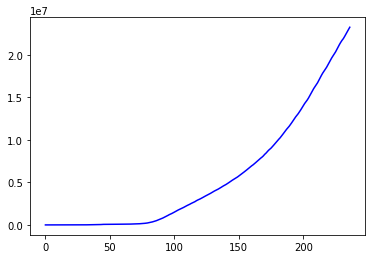

In [ ]:
plt.plot(y,'-b')
plt.show()

In [ ]:
#we create more features for the working
#Hence we are importing the Polynomial features from pyplot
from sklearn.preprocessing import PolynomialFeatures
polyFeat=PolynomialFeatures(degree=3)
x=polyFeat.fit_transform(x)

#hence we will get values of x, x**2, x**3

In [ ]:
x

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 9.0000000e+00, 2.7000000e+01],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01, 1.2500000e+02],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02],
       [1.0000000e+00, 7.0000000e+00, 4.9000000e+01, 3.4300000e+02],
       [1.0000000e+00, 8.0000000e+00, 6.4000000e+01, 5.1200000e+02],
       [1.0000000e+00, 9.0000000e+00, 8.1000000e+01, 7.2900000e+02],
       [1.0000000e+00, 1.0000000e+01, 1.0000000e+02, 1.0000000e+03],
       [1.0000000e+00, 1.1000000e+01, 1.2100000e+02, 1.3310000e+03],
       [1.0000000e+00, 1.2000000e+01, 1.4400000e+02, 1.7280000e+03],
       [1.0000000e+00, 1.3000000e+01, 1.6900000e+02, 2.1970000e+03],
       [1.0000000e+00, 1.4000000e+01, 1.9600000e+02, 2.7440000e+03],
       [1.0000000e+00, 1.5000000e+

In [ ]:
#Now we train the model
#No need to split as the data is very small
'''rare case'''

from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x,y)
accuracy=model.score(x,y)
#we round of accuracy and print
print('Accuracy: {}'.format(round(accuracy*100,3))+'%')

Accuracy: 99.927%


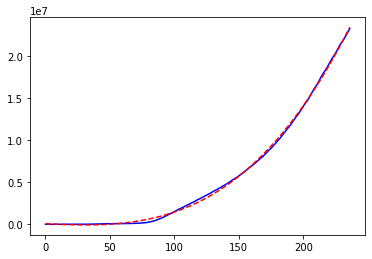

In [ ]:
y_pred=model.predict(x)
plt.plot(y,'-b')
plt.plot(y_pred,'--r')
plt.show()

In [ ]:
#as we do not have the testing data for this we will further overfit it

#Predicting data
days_to_predict=2
print('-'*30);print('PREDICTION');print('-'*30)
print(f'prediction for cases after {days_to_predict} days:',end='')

x_pred=[[len(data)+days_to_predict]]
raw_val=model.predict(polyFeat.fit_transform(x_pred))
print(round(float(raw_val/1000000),2),'Million')

------------------------------
PREDICTION
------------------------------
prediction for cases after 2 days:24.03 Million


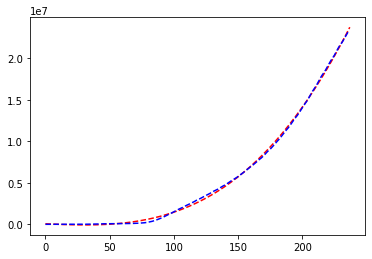

In [ ]:
#plotting final
x1=np.array(list(range(1,len(data)+days_to_predict))).reshape(-1,1)
y1=model.predict(polyFeat.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y,'--b')
plt.show()